# Xiaobo He <font color='blue'> Score:  40/40 </font>

#### <font color='blue'> Please see the corresponding cells for comments (in blue) on each individual question, if there's any. </font>

# MTH9879 Homework 1

Assigned: February 2, 2016.
Due: February 16, 2016 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) and Jim Gatheral (jim.gatheral@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 1. (4 points) <font color=blue> Score: 4/4 </font>

Read Chapter 1 of Market Liquidity by Foucault, Pagano and R&ouml;ell.
What algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010? Why did it cause a crash? How could this algorithm have been
amended so as to avoid the ensuing disaster?


Answer:
It is the “constant participation rate” strategy which was being used by the seller who triggered the Flash
Crash of May 6, 2010.

The initial order was to sell seventy-five thousand E-mini futures contracts on the S&P 500 index.  The trader splitted the order in such a way that each “child” order represents a fixed fraction of the total trading volume over a given period of time, say a minute.  It is OK if the original order size is reseasonable large, but for this case, the problem is that the size of "parent" order is too large and the "child" orders were still considered as large volume. Then a large sell order may trigger a very sharp price drop, as it quickly exhausts the market’s liquidity. Then it precipitated additional sales by high-frequency traders, which spread the crash quickly from the futures market to the stock market.

To avoid the ensuing disaster, the algorithm can be amended to makes his strategy contingent on the execution price received, for example, to couple the trading activity to current available liquidity to trade less as the price impact increase.

## The Smith Farmer zero-intelligence model

### Set up R-environment

The following code sources *ziSetup.R* which contains all the functions required for the problem.

In [1]:
#download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
#unzip(zipfile="ziSetup.zip")

source("ziSetup.R")

### 2. (4 points) <font color=blue> Score: 4/4 </font>

Using the provided functions in *ziSetup.R* (with $\alpha = 1$, $\mu = 10$, $\delta = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

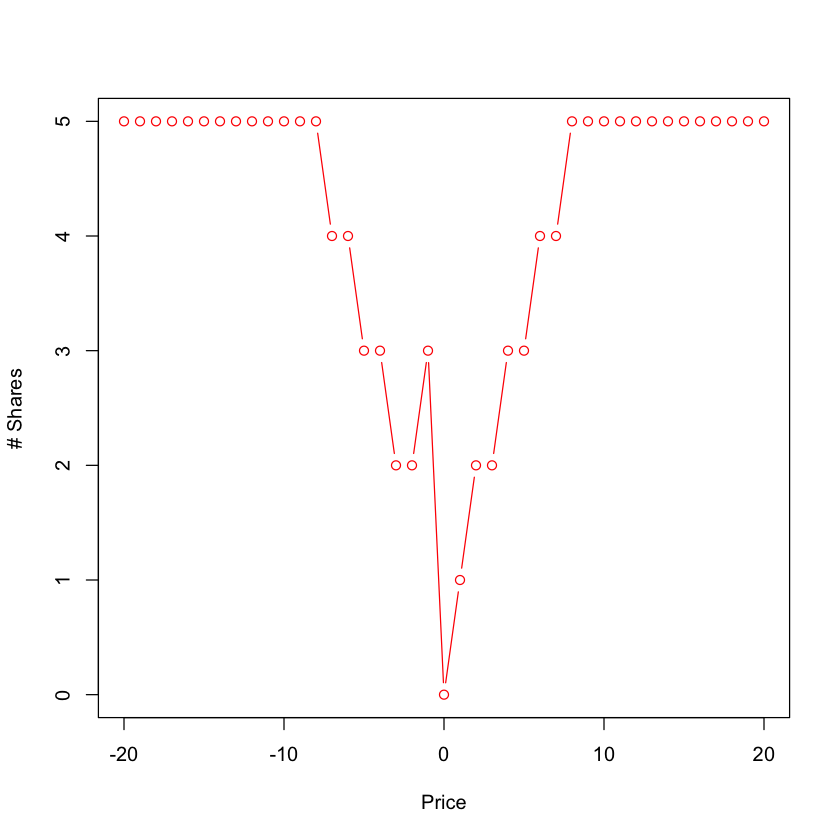

In [2]:
logging <- F

# initialize parameters
alpha <- 1.0
mu <- 10.0
delta <- 1/5.0

# initialize order book
initializeBook5()

# add two orders to the best bid side of the book
limitBuyOrder(bestBid())
limitBuyOrder(bestBid())

# plot the book shape
plot(-20:20,bookShape(20),main=NA,xlab="Price",ylab="# Shares", col="red", type="b")

### 3. (16 points) <font color=blue> Score: 16/16 </font>

(a) Using the code supplied to generate Figure 2 as a template, simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|$\alpha$|$\mu$|$\delta$|
-----|-----:|-------:|
I| 1 | 10 | $\frac15$
II| 1 | 8 |  $\frac15$
III| 1 |  10 | $\frac16$
IV| 1  | 10 | $\frac18$ 

(Warning: This might take longer than 15 minutes to run!).

(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).


(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

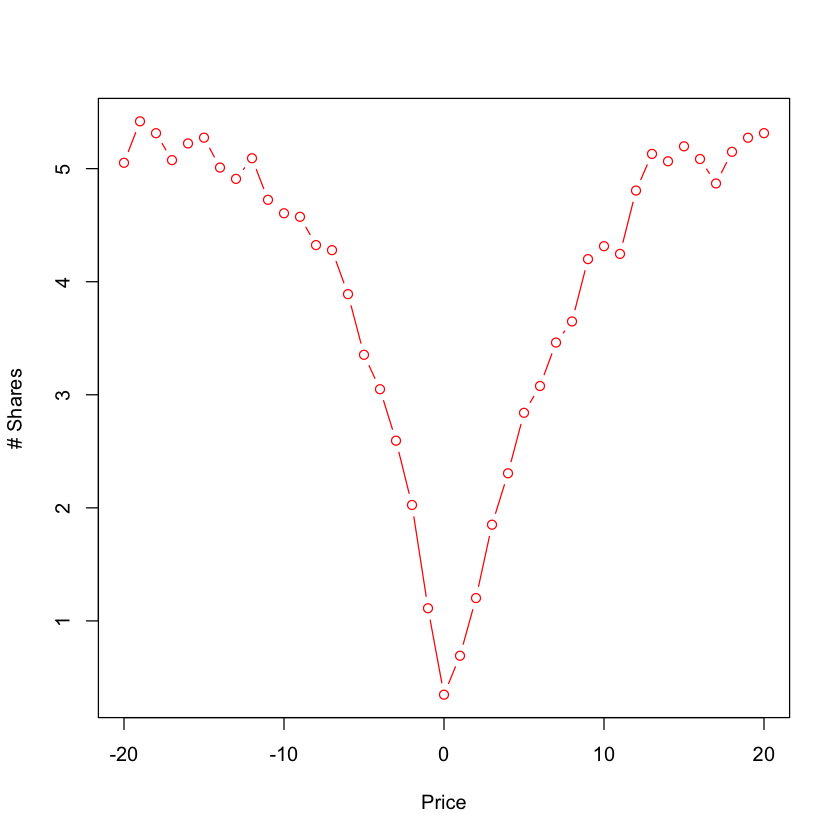

In [3]:
####### (a) & (b)
########### parameter set I

logging <- F

# initialize parameters
alpha <- 1.0
mu <- 10.0
delta <- 1/5.0

# initialize the order book   
initializeBook5()


for(count in 1:1000){
    generateEvent()
}

#numEvents <- 100000
numEvents <- 10000
avgBookShape1 <- bookShape(20)/numEvents
for(count in 2:numEvents){
    generateEvent()
    avgBookShape1 <- avgBookShape1+bookShape(20)/numEvents
}
    

# plot the book shape   

plot(-20:20,avgBookShape1,main=NA,xlab="Price",ylab="# Shares", col="red", type="b")

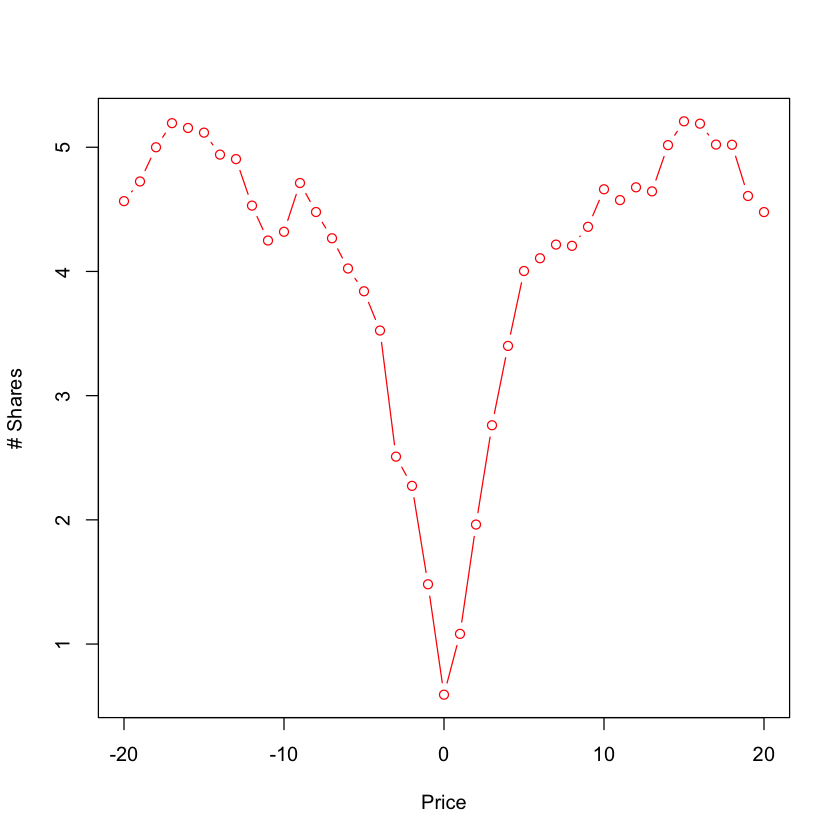

In [4]:
####### (a) & (b)
########### parameter set II

logging <- F

# initialize parameters
alpha <- 1.0
mu <- 8.0
delta <- 1/5.0

# initialize the order book   
initializeBook5()


for(count in 1:1000){
    generateEvent()
}

numEvents <- 10000
avgBookShape2 <- bookShape(20)/numEvents
for(count in 2:numEvents){
    generateEvent()
    avgBookShape2 <- avgBookShape2+bookShape(20)/numEvents
}
    

# plot the book shape   

plot(-20:20,avgBookShape2,main=NA,xlab="Price",ylab="# Shares", col="red", type="b")

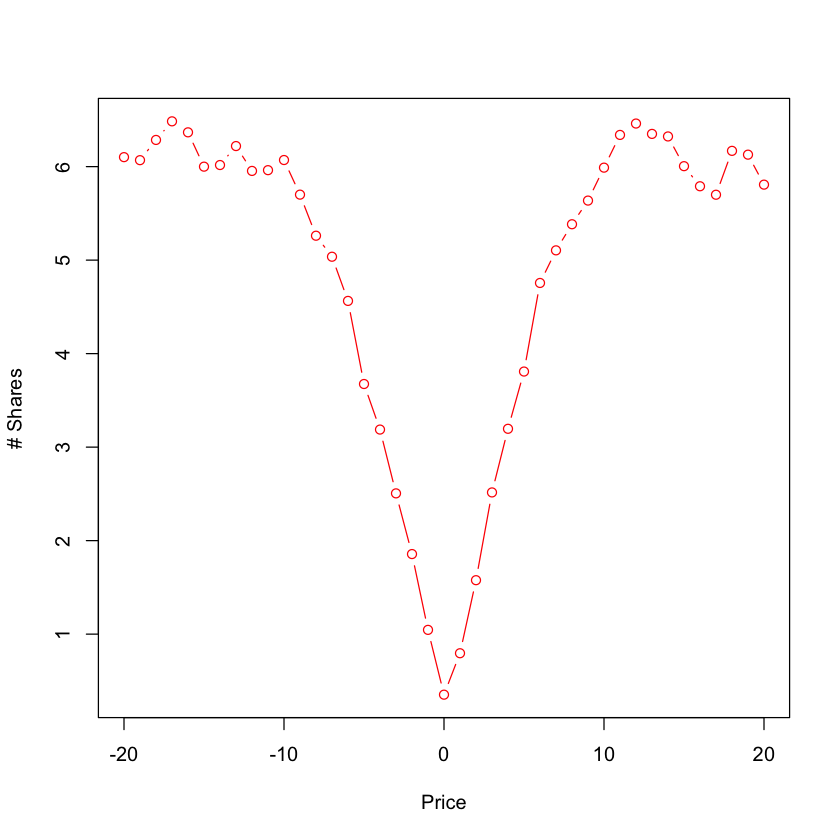

In [5]:
####### (a) & (b)
########### parameter set III

logging <- F

# initialize parameters
alpha <- 1.0
mu <- 10.0
delta <- 1/6.0

# initialize the order book   
initializeBook5()


for(count in 1:1000){
    generateEvent()
}

numEvents <- 10000
avgBookShape3 <- bookShape(20)/numEvents
for(count in 2:numEvents){
    generateEvent()
    avgBookShape3 <- avgBookShape3+bookShape(20)/numEvents
}
    

# plot the book shape   

plot(-20:20,avgBookShape3,main=NA,xlab="Price",ylab="# Shares", col="red", type="b")

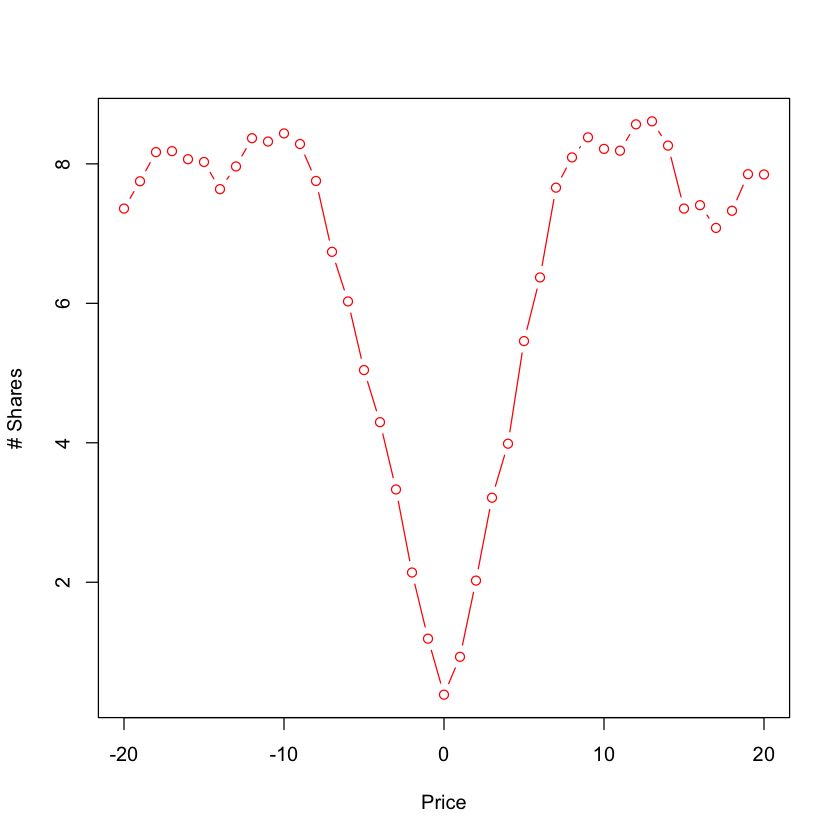

In [6]:
####### (a) & (b)
########### parameter set IV

logging <- F

# initialize parameters
alpha <- 1.0
mu <- 10.0
delta <- 1/8.0

# initialize the order book   
initializeBook5()


for(count in 1:1000){
    generateEvent()
}

numEvents <- 10000
avgBookShape4 <- bookShape(20)/numEvents
for(count in 2:numEvents){
    generateEvent()
    avgBookShape4 <- avgBookShape4+bookShape(20)/numEvents
}
    

# plot the book shape   

plot(-20:20,avgBookShape4,main=NA,xlab="Price",ylab="# Shares", col="red", type="b")

In [7]:
# function to calculate slope
slope <- function(orderbook){
    y <- orderbook[21:30]
    x <- 1:10
    fit <- lm(y~x)
    return (fit$coefficients[2])
}

slope(avgBookShape1)
slope(avgBookShape2)
slope(avgBookShape3)
slope(avgBookShape4)

x 
0.4295794

x 
0.4344145

x 
0.63422

x 
0.976903

  Answer (c):
  
  According to the theoretical formular,  $ \frac{\alpha^2}{\mu\,\delta} $, the slopes of the order books are 0.5, 0.625, 0.6, and 0.8 respectively. 
The simulation results are 0.506, 0.504, 0.608, and 0.837 respectively. Except to the parameter set II, the results agree very well with the theory.

In [8]:
##### function to calculate depth
depth<-function(orderbook){
    return (mean(cbind(orderbook[1:10],orderbook[31:40])))
}

depth(avgBookShape1)
depth(avgBookShape2)
depth(avgBookShape3)
depth(avgBookShape4)

[1] 5.011415

[1] 4.850175

[1] 6.13565

[1] 7.935545

Answer (d):
According to the theoretical formular, $ \alpha/\delta $, the asymptotic book depths of the order book are 5, 5, 6, and 8 respectively.
The simulation results are 5.00, 4.98, 5.99, and 7.96 respectively. The results agree very well with the theory.

### The following code sets up the data required for Problem 4.

In [3]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip", destfile="ziSimResults.rData.zip")
unzip(zipfile="ziSimResults.rData.zip")
load("ziSimResults.rData")

### 4. (12 points) <font color=blue> Score: 12/12 </font>

The datafile *ziSimResults.rData* contains a list of bid and ask prices after 100 events resulting from 10,000 simulations of the SFGK model with $\alpha = 1$, $\mu = 10$, and $\delta = 1/5$. The $j$th element of the list has results for an initial book configuration with $q_b = j$ shares on the bid side and $q_a = 1$ share on the ask side.

In [31]:
head(data.frame(ziSimResults))

,bid,ask,bid.1,ask.1,bid.2,ask.2,bid.3,ask.3,bid.4,ask.4,bid.5,ask.5,bid.6,ask.6,bid.7,ask.7,bid.8,ask.8,bid.9,ask.9
1,-1,2,-2,2,-2,4,-1,3,-1,3,-1,2,-1,2,0,3,-1,2,-1,0
2,-1,4,-3,-1,-2,3,1,3,-2,1,-1,0,-1,3,0,4,-1,1,1,2
3,-2,-1,-1,0,-1,0,-1,3,-2,2,-1,2,2,3,-1,1,-1,1,-1,0
4,0,3,-2,3,-2,3,-2,1,0,3,-1,2,-1,1,-1,2,-1,0,-1,3
5,-2,2,0,4,0,3,3,5,-2,2,0,3,-1,2,-1,2,-1,2,1,3
6,-2,0,-4,1,-1,1,-3,2,-1,3,1,3,-1,1,1,2,3,4,2,3


(a) For each size $q_b$ at best bid, compute the mean mid-price after 10,000 events and with error computed as standard deviation of the mean.

(b) Plot mean mid-price vs size at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I$ on the x-axis, reproducing Figure 7 in the lecture slides.


(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

In [4]:
####answer to (a)

prices_df <- data.frame(ziSimResults)

mean_prices <- rep(0,10)
sd_prices <- rep(0,10)

for (i in 0:9){
    vector1 <- unlist(prices_df[2*i+1]+prices_df[2*i+2])
    vector1 <- vector1/2
    mean_prices[i+1] <- mean(vector1)
    sd_prices[i+1] <- sd(vector1)
}

sd_prices <- sd_prices/100

#mean mid-price
mean_prices

[1] 0.00590 0.21550 0.41350 0.56635 0.66850 0.74110 0.80530 0.80955 0.83880
[10] 0.83435

In [5]:
#standard deviation of the mean
sd_prices

[1] 0.015379863 0.014316301 0.013108355 0.012291150 0.011233583 0.010380166
 [7] 0.010190907 0.009888385 0.009779878 0.009617315

In [6]:
data.frame(mean_prices, sd_prices)

,mean_prices,sd_prices
1,0.0059,0.01537986
2,0.2155,0.0143163
3,0.4135,0.01310835
4,0.56635,0.01229115
5,0.6685,0.01123358
6,0.7411,0.01038017
7,0.8053,0.01019091
8,0.80955,0.009888385
9,0.8388,0.009779878
10,0.83435,0.009617315


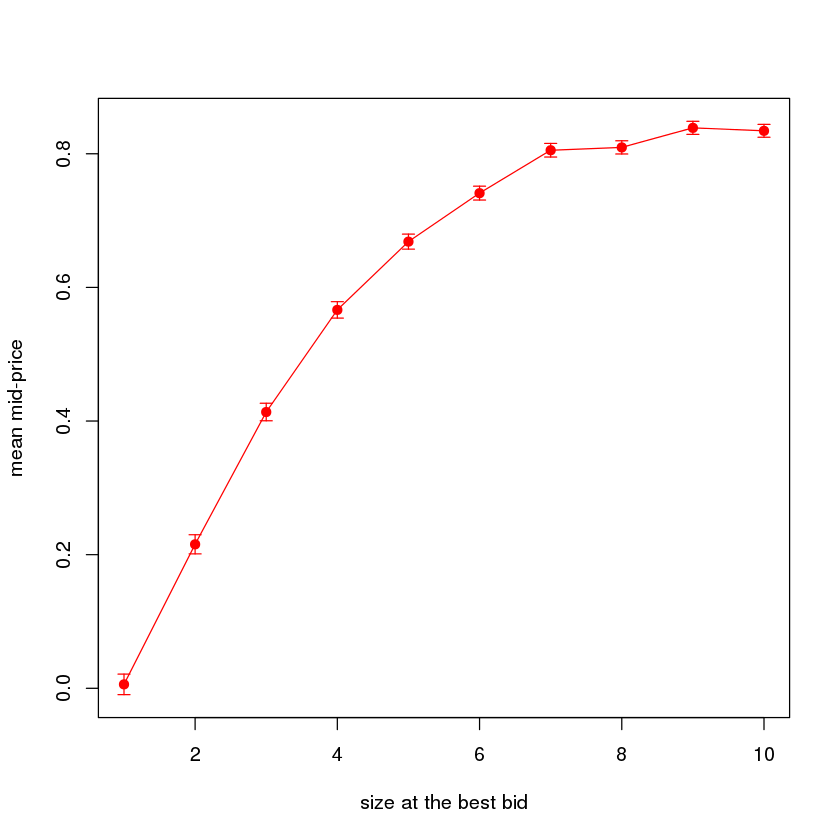

In [7]:
####answer to (b)

plot(c(1:10), mean_prices,
    ylim = range(c(mean_prices-sd_prices, mean_prices+sd_prices)),
    pch = 19, xlab = "size at the best bid", ylab = "mean mid-price", main = NA, col = 34)

lines(c(1:10),mean_prices,col = 34)

arrows(c(1:10), mean_prices-sd_prices, c(1:10), mean_prices+sd_prices, length = 0.05, angle = 90,code = 3,col = 34)

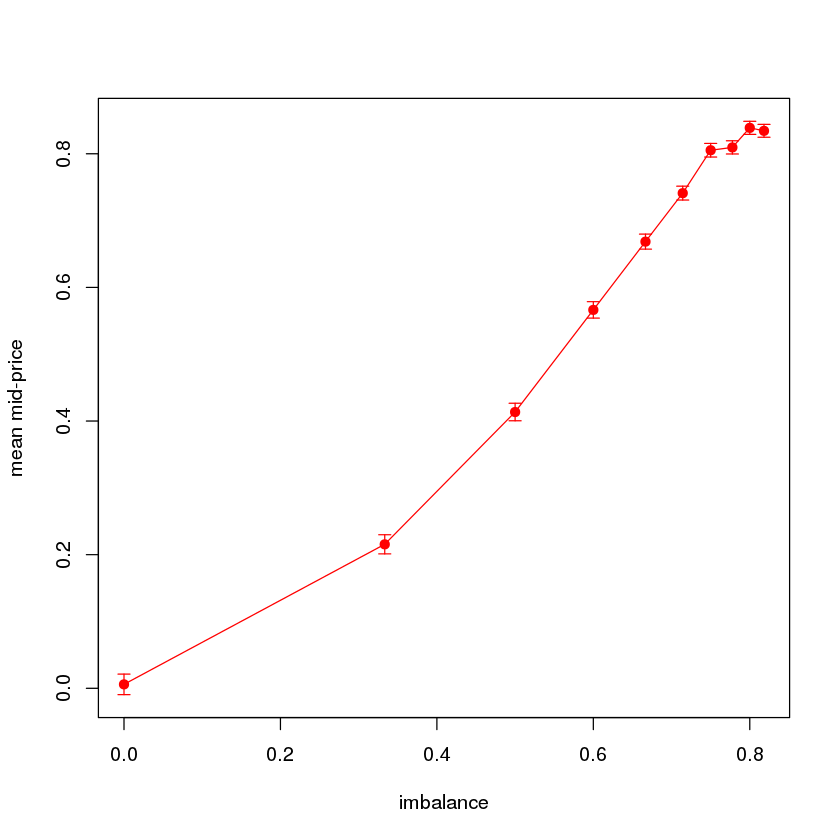

In [8]:
####answer to (c)

vec_x  <- c(1:10)
for (i in 1:10){
    vec_x[i] <- (i-1)/(i+1)
}
plot(vec_x, mean_prices,
    ylim = range(c(mean_prices-sd_prices, mean_prices+sd_prices)),
    pch = 19, xlab = "imbalance", ylab = "mean mid-price", main = NA, col = 34)

lines(vec_x, mean_prices,col = 34)

arrows(vec_x, mean_prices-sd_prices, vec_x, mean_prices+sd_prices, length = 0.05, angle = 90,code = 3,col = 34)

(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

Answer: This will drive the future price to move up.

## Is the market price a martingale?

### 5. (4 points) <font color=blue> Score: 4/4 </font>

A derivatives quant explains (patiently) to you that asset prices are martingales (informally speaking that expected price changes are zero). Do you agree? How is your understanding consistent with the derivative quant’s understanding?

It depends on the time scale where the asset pricing is discussing. In a large time scale, the market will have enough time to rebalance and eventually the derivative price is a martingale, which is the case of risk-neutral measurement. 

However, in the very short time, a new impact will drive the market to an imbalanced state, where the asset price is not a martingale in this short time scale. The martket needs some time to rebalance itself, and the speed can not be infinite. Then there will be some arbitrage opportunities for high frequent trading. 

Personally I beleive the market is efficient in large time scale to make the derivative price be a martinale, but in the microcosmic scale, it can not be efficient enough to be in balanced state any time.

<br>

<font color=blue>
The key point is that microstructure models show that if you condition on the state of the book or the history
of order flow, you can predict future prices. If you don’t condition either on the state of the
order book or on the history of order flow (as might be typically the case for delta hedgers),
the price process can be a martingale.
</font>